<H1>Machine Learning Engineer Nanodegree Capstone Project</H1>

<h2>Project : Machine learning in Finance</h2>


<i><b>*This jupyter notebook is created with the purpose of explaining the code written in python 2.7 for the capstone project. Detailed explanations of the jutsification ,approach ,problem statement are supplied in the Capstone project report submitted along with this file. However, short explanations will be given here when there is a need for background information while the reviewer goes through the code.</i></b> 

<h2><b>Section 1: Definition</h2><br>
<h3><b>Introduction</b></h3><br>
<p>The project will be an approach to leverage the power of data to make predictions of a stock to the maximum possible accuracy. Investment funds are hedge funds are always on the lookout for processes to maximize profit. With advances in computational power and data processing techniques coupled with the ubiquitous nature of devices connected to the internet, machine learning based are extensively used to study the performance of stocks. There are generally two approaches to predicting the price of a stock in finance.<br>

<ul>
<li>Qualitative/Fundamental Analysis- Investors study terms sheets , profit and loss statements , company’s credibility ,recent developments in the market and so on and then execute a trade. This approach to trading requires extensive reasoning and human intelligence and hence is not a good problem for machine learning to solve.</li>
<li>The second approach is to use quantitative analysis to predict the future price of the stock based on various statistical parameters like rolling mean, daily returns, rolling standard deviation and so on. This approach makes use of data driven methods and would be a good problem to be investigated using machine learning.</li>
</ul></p>


<h3><b>Getting Started: Stock Trends</b></h3><br>

<p align="justify">The stock under observation is the stock of Apple('AAPL').Apple is a renowned technology company which was founded in 1976 and went public in the year 1980.The data is available for about 36 years and as company it has seen a lot of ups and downs.Hence a Machine learning algorithm trained on this dataset would probably be able to see all types of situations the stock could possibly see itself in.The stock price of Apple is visualised as shown below.
    

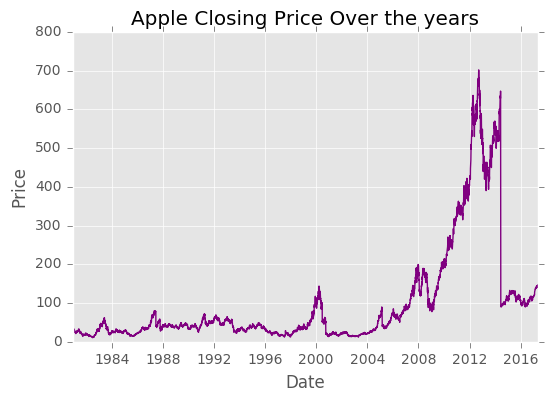

In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

style.use('ggplot')
quandl.ApiConfig.api_key = '1NzgmzP1XT9QYBsxjpYc'

adf = quandl.get("WIKI/AAPL")
candle=adf.copy()
adf=adf[["Adj. Close","Close","Split Ratio","Ex-Dividend"]]
adfa=adf.copy()
plt.plot(adf.index.get_values(),adf['Close'],color='Purple',label='AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Closing Price Over the years')
plt.show()

1985 to 1996 was a period of turmoil for apple and it can be seen fluctating during this period.The closing price is plotted during this period as shown below.This period of turmoil coupled with the rise in growth of Apple in the previous two decades make it a good stock to study for a machine learning problem.

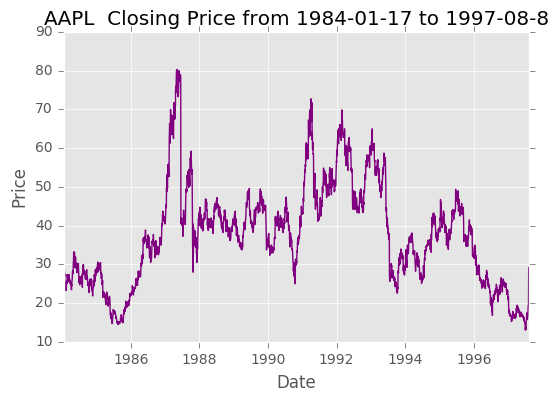

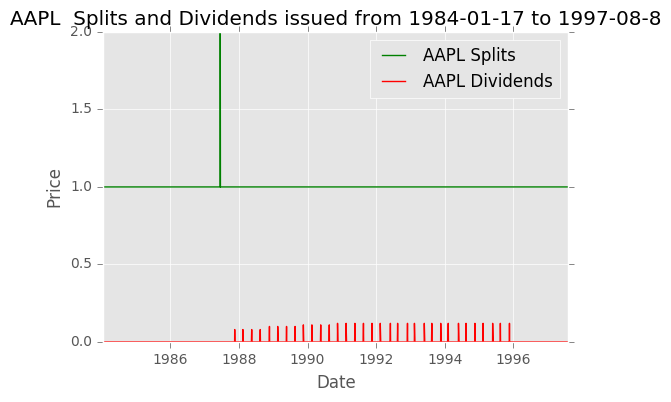

In [2]:
start_date='1984-01-17'
end_date='1997-08-8' 
adf= adf.ix[start_date:end_date]

plt.plot(adf.index.get_values(),adf['Close'],color='Purple',label='AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL  Closing Price from ' + start_date + ' to ' +end_date)
plt.show()
plt.plot(adf.index.get_values(),adf['Split Ratio'],color='Green',label='AAPL Splits')
plt.plot(adf.index.get_values(),adf['Ex-Dividend'],color='Red',label='AAPL Dividends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL  Splits and Dividends issued from ' + start_date + ' to ' +end_date)
plt.legend()
plt.show()

<p>However,for the purpose of analysis,it is necessary to take the Adj.Closing price as metric rather than the actual closing price. This is because over time, the company may go for a stock split or issue dividends or rights offerings.In these case, if the closing price is seen as a metric it may be seen as a bad stock when in reality it might have actually been performing well.<br>
<br>
The following excerpt from investopedia explains it with an example:<br>
<i>"Closing prices do not reflect corporate actions, which may skew returns significantly. For example, on June 9, 2014, Apple Inc. (NASDAQ: AAPL) issued a seven-for-one stock split. Therefore, Apple's shares outstanding was increased by a multiple of seven, while its closing share price was divided by seven. On June 6, 2014, prior to Apple's stock split, it had a closing price of \$645.57 per share. After Apple's seven-for-one stock split, the stock had a closing price of \$93.70 per share on June 9, 2014. Since the closing prices do not include adjustments for corporate actions, the calculation of Apple's returns based on closing prices would have indicated a return of -85.49%, or (\$93.70 - \$645.56)/\$645.57, in just one trading day</i><a href="http://www.investopedia.com/terms/c/closingprice.asp">[1]".</a><br><br>

Therfore the adjusted closing price is plotted as shown below:



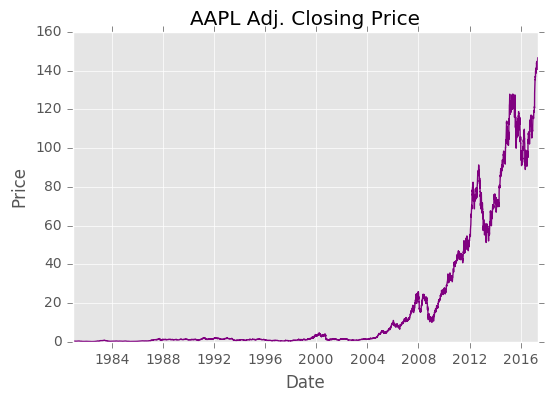

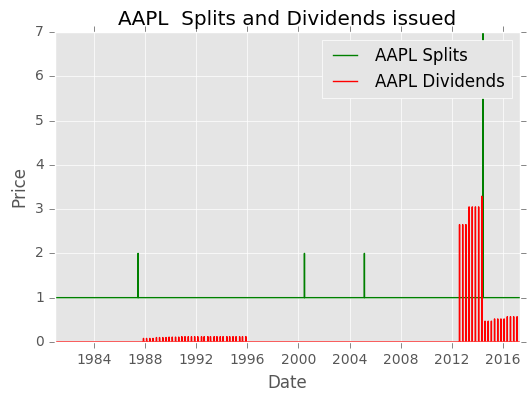

In [3]:
plt.plot(adfa.index.get_values(),adfa['Adj. Close'],color='Purple',label='AAPL ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Adj. Closing Price')
plt.show()
plt.plot(adfa.index.get_values(),adfa['Split Ratio'],color='Green',label='AAPL Splits')
plt.plot(adfa.index.get_values(),adfa['Ex-Dividend'],color='Red',label='AAPL Dividends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL  Splits and Dividends issued')
plt.legend()
plt.show()


<h3>Getting Data</b></h3>

The dataset for the purpose of this project will be the Stock of ‘AAPL’ or Apple. This is data is chosen because it has a lot of data points (right from the 1980’s) and hence is a good problem for a machine learning based approach. Data is obtained through the Quandl API in Python 2.7. The data obtained is of the time-series type and it is processed using Pandas in Python. The Quandl API gives information about the opening price, closing price, daily high, daily low ,adjusted close and also the indication of the issue of dividends or stock splits (with a 1 or 0).The very basis of technical analysis is the prediction of stock prices by statistical approaches. However, the amount of insight a human can achieve is much less than what a machine can do given the same amount of data. Hence using a machine learning based predictor would be a very good way to go about with this dataset.<br>

<a href="https://www.quandl.com">Quandl</a> is used to get data for the machine learning project here.Quandl has a python API which allows querying financial information of almost any stock on the planet.It requires creating an account with their website doing which gives you the access key to use their API.The steps to access the quandl API are shown below.



In [4]:
import quandl 
quandl.ApiConfig.api_key = '1NzgmzP1XT9QYBsxjpYc' #API access key

df = quandl.get("WIKI/AAPL")
print df.head()#Show the first five rows of the dataframe

start_date='2004-01-17'
end_date='2008-03-8' 
df= df.ix[start_date:end_date]
print df.head()# splice the data for queried date range

             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1980-12-12  28.75  28.87  28.75  28.75  2093900.0          0.0          1.0   
1980-12-15  27.38  27.38  27.25  27.25   785200.0          0.0          1.0   
1980-12-16  25.37  25.37  25.25  25.25   472000.0          0.0          1.0   
1980-12-17  25.87  26.00  25.87  25.87   385900.0          0.0          1.0   
1980-12-18  26.63  26.75  26.63  26.63   327900.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1980-12-12   0.426158   0.427937  0.426158    0.426158  117258400.0  
1980-12-15   0.405851   0.405851  0.403924    0.403924   43971200.0  
1980-12-16   0.376057   0.376057  0.374278    0.374278   26432000.0  
1980-12-17   0.383468   0.385395  0.383468    0.383468   21610400.0  
1980-12-18   0.394733   0.

Since it is a requirement of the project to specify the starting and the ending dates for the query , the variables <i>start_date</i> and <i>end_date</i> are incorporated to splice the data for that date range.


Among the features supplied above, only a few features are deemed necessarcy and hence the columns can be spliced accordingly.

In [5]:
df = df[["Adj. Open", "Adj. High", "Adj. Low", "Adj. Close", "Adj. Volume","Split Ratio","Ex-Dividend"]]

However, certain additional features like the high low percentage change, the open close percentage change, the 50 day and the 10 day rolling mean and so on are required to be computed from the parameters we have at hand.These operations are done and we finally have all the features we require for this machine learning project.

In [6]:

df["HL_PCT"] = (df["Adj. High"] - df["Adj. Low"])/df["Adj. Low"] * 100.0 #The High-Low percentage change 
df["PCT_change"] = (df["Adj. Close"] - df["Adj. Open"])/df["Adj. Open"]* 100.0 #The Close-Open  percentage change

df["Rolling Mean 10"]=pd.rolling_mean(df["Adj. Close"],window=10) #The 10 day rolling mean
df["Rolling Mean 50"]=pd.rolling_mean(df["Adj. Close"],window=50) #The 50 day rolling mean
df["Rolling std"]=pd.rolling_std(df["Adj. Close"],window=10) #The 10 day rolling standard deviation
df = df[["Adj. Close","HL_PCT", "PCT_change", "Adj. Volume","Rolling std","Rolling Mean 50","Rolling Mean 10","Split Ratio","Ex-Dividend"]]

/Users/ARM/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/ARM/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
/Users/ARM/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()


In [7]:
forecast_col="Adj. Close"
df.fillna(-99999,inplace=True)

new=df.copy()

forecast_out=30 # number of days into the future
df['label']=df[forecast_col].shift(-forecast_out)
df = df[["Adj. Close","HL_PCT", "PCT_change", "Adj. Volume","Rolling std","Rolling Mean 50","Rolling Mean 10","Split Ratio","Ex-Dividend","label"]]# shifting and adding the new data to the old dataframe
df.dropna(inplace=True)

All the columns which have a NaN value in any of thier entries are added an extremely small number so as to not lose the data pertaining to these rows.Additionally ,the Adj. Closing price of 30 days in the future is the variable which has to be predicted on the input of those features.These features are added by shifting the dataframe up by 30 rows and adding it to the existing dataframe.The rows which do not have any values for this new column are now dropped.

<h3><b>Exploratory Analysis</h3>

The data can be summarized using the describe function.This gives us a summary of all the data points we have in out dataset.This can help us in seeing if the model behaves in a fashion we expect it to and if there are any surprising results that we should consider.

In [8]:
import pandas as pd
from IPython.display import display

print df.tail()
display(df.describe())


            Adj. Close     HL_PCT  PCT_change  Adj. Volume  Rolling std  \
Date                                                                      
2008-01-17   20.845459   4.380760   -0.383877  439464900.0     0.979237   
2008-01-18   20.906353   3.846877   -0.216437  431085900.0     1.017660   
2008-01-22   20.165251   9.575342    5.119546  608688500.0     1.136921   
2008-01-23   18.018644  10.987791    2.116161  843242400.0     1.649590   
2008-01-24   17.568800   6.582835   -3.135938  501466700.0     1.913844   

            Rolling Mean 50  Rolling Mean 10  Split Ratio  Ex-Dividend  \
Date                                                                     
2008-01-17        23.408486        22.380785          1.0          0.0   
2008-01-18        23.329633        22.138631          1.0          0.0   
2008-01-22        23.250185        21.853592          1.0          0.0   
2008-01-23        23.155878        21.436682          1.0          0.0   
2008-01-24        23.078736   

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,Rolling std,Rolling Mean 50,Rolling Mean 10,Split Ratio,Ex-Dividend,label
count,1011.000000,1011.000000,1011.000000,1.011000e+03,1011.000000,1011.000000,1011.000000,1011.000000,1011.0,1011.000000
mean,8.815968,3.110067,0.022118,1.951845e+08,-889.925393,-4838.415404,-881.477428,1.000989,0.0,9.256005
std,6.011920,1.626634,2.053864,1.160337e+08,9397.572960,21487.332785,9398.375871,0.031450,0.0,6.002347
min,1.411593,0.675788,-7.840806,3.540880e+07,-99999.000000,-99999.000000,-99999.000000,1.000000,0.0,1.549579
25%,4.537311,2.060659,-1.100046,1.134010e+08,0.097208,4.105050,4.410274,1.000000,0.0,4.760808
50%,8.013485,2.736842,0.021097,1.729756e+08,0.196076,7.863177,7.995488,1.000000,0.0,8.397135
75%,11.322547,3.671969,1.201293,2.405680e+08,0.332716,11.235558,11.272858,1.000000,0.0,11.806467
max,25.890658,12.185889,8.697411,8.432424e+08,1.913844,23.760121,25.242064,2.000000,0.0,25.890658


The candlestick charts are most commonly used in finance because they present all necessray information about the stock in a very succint manner which enables the observer to visulize the trends better than by using convnetional graphs. Here, the AAPL stock is visualized from a predefined date period. 


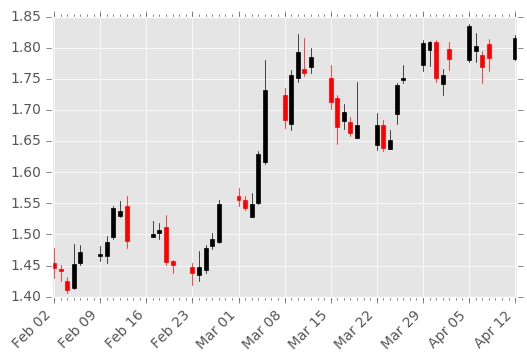

In [9]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import quotes_historical_yahoo_ohlc, candlestick_ohlc


# (Year, month, day) tuples suffice as args for quotes_historical_yahoo
date1 = (2004, 2, 1)
date2 = (2004, 4, 12)


mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

quotes = quotes_historical_yahoo_ohlc('AAPL', date1, date2)
if len(quotes) == 0:
    raise SystemExit

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
#ax.xaxis.set_minor_formatter(dayFormatter)

#plot_day_summary(ax, quotes, ticksize=3)
candlestick_ohlc(ax, quotes, width=0.6)

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


Two important metrics which can help identify the performance of a stock are the growth rate and teh daily returns.The daily return also help visualize the performance  of a company during that time period.

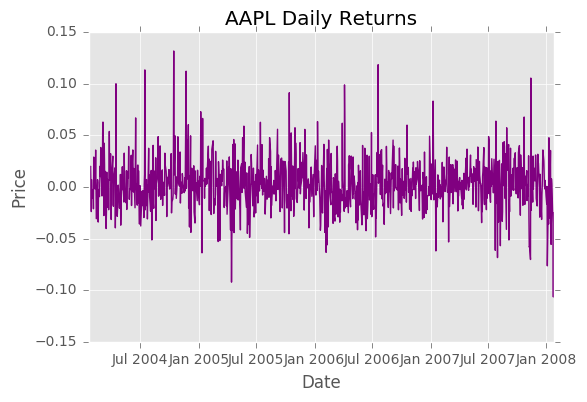

In [10]:
daily_returnsdf=df.copy()
daily_returnsdf[1:]=(df[1:]/df[:-1].values)-1
daily_returnsdf.ix[0,:]=0
daily_returnsdf=daily_returnsdf.rename(columns={'Adj. Close': 'Daily Returns'})
plt.plot(daily_returnsdf.index.get_values(),daily_returnsdf['Daily Returns'],color='Purple',label='AAPL ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Daily Returns')
plt.show()

The logarithmic scale is used to visualize growth rate here because it doesnt depend on a denominator and hecne it is possible to get a clearer picture about the stock growth.


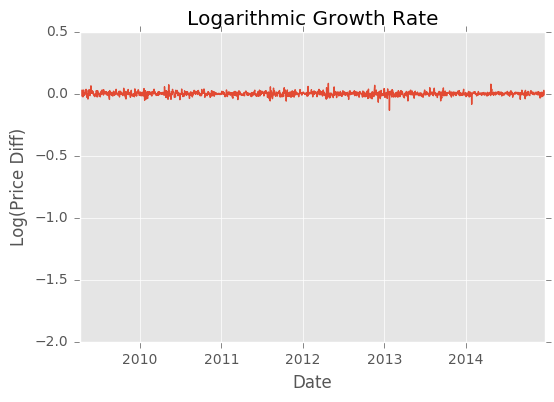

In [38]:
import numpy as np
sc=np.array(df["Adj. Close"])
stock_change =np.log(sc) - np.log(np.roll(sc,1))
plt.plot(df.index.get_values(),stock_change) # shift moves dates back by 1.
plt.title('Logarithmic Growth Rate')
plt.xlabel('Date')
plt.ylabel('Log(Price Diff)')


# Preparing the Data


It is  important to set the target data point for which stock should predict.Since we need to predict the value of the stock after 30 days, it is necessary to shift the Adj Close price after 30 days as the adjusted close price for the current day.This was accomplished by implementing the forecast variable snippet shown in the previous section.


It is now necessary to preprocess the data and spit it into the X and y components for training.The preprocessing is done by making use of the preprocessing.scale() function in the preprocessing library. This ensures that the scale of all the data points remains the same in the X dataset.Other types of processing are not really necessary since this the data is obtained from a repository which contains clean data.Also, some of the data is stored in X_recent in order to use them for data points to validate the data later on.

In [12]:
from sklearn import preprocessing
X=np.array(df.drop(['label'],axis=1))
X_init=X.copy()
#X=X[:,1:] #cooment this line to exclude Adj. Close as a feature
X=preprocessing.scale(X)
X_recent=X[-forecast_out:]
X=X[:-forecast_out]

The data points have to be split into training data and testing data which is accomplished by the train_test_split( ) function available in the cross_validation library. The testing size is  set to 30 percent of the total data left in X.

In [16]:
from sklearn import cross_validation
df.dropna(inplace= True)
y=np.array(df['label'])
y=y[:-forecast_out]
X_train, X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.3)

Now that we have the data spit into features variables and target variables we can start employing machine learning algorithms to build a forescaster for 'AAPL' Stocks.


<h3>Machine learning Algorithms</h3>

The problem here is to predict the Adj Closing Price 30 days into to the future by making use of the features given.The problem is a regression type of problem which can make use of algorithms like Linear Regression ,Static Vector Regression ,Decision Tree Regressor and Multilayer Perceptrons.<br><br>
The advantages, disadvantages and the application of these algorithms are as described below:<br>

Since there exist very limited models in the finance domain to benchmark derived models against, the model obtained from linear regression will be considered as a benchmark for this project. 


<h3><b>Linear Regression</b></h3>

Linear regression is the simplest machine learning Algorithm available.It is often used in cases where the data needs to fit to single  straight line. In cases where benchmarking data isn't available or is faulty(like in our case), the model derived from this algorithm can be used as a benchmark model because it is the simplest possible model to obtain.<br>
However, linear regression is very susceptible to outliers which can affect the overall accuracy of the model.

R2 Score =0.941167655126 Error=9.41320461838


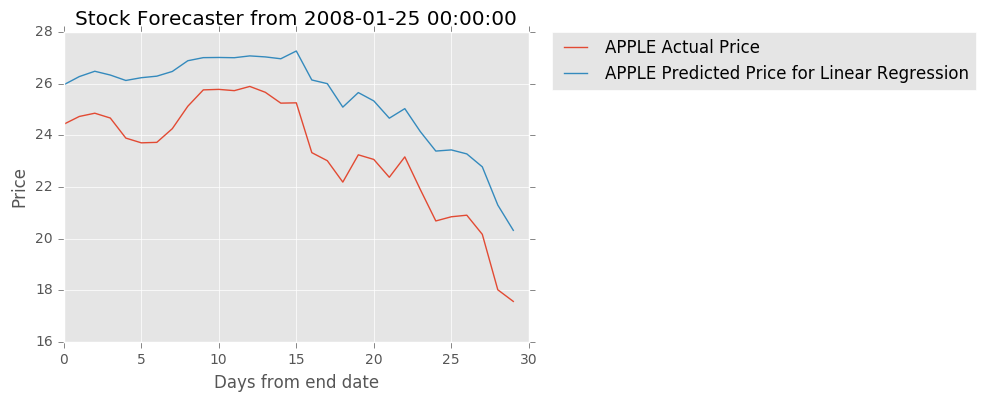

In [25]:
import time,datetime
from sklearn.linear_model import LinearRegression
clf_A=LinearRegression(n_jobs=-1)
clf_A.fit(X_train,y_train)
forecast_setA=clf_A.predict(X_recent)
accuracy_A=(clf_A.score(X_test,y_test))
error_A = -(X_init[-forecast_out:,0]-forecast_setA)/X_init[-forecast_out:,0]*100.0
last_date=df.iloc[-1].name
one_day = 86400
last_unix = time.mktime(last_date.timetuple())
next_unix=last_unix+one_day
next_date=datetime.datetime.fromtimestamp(next_unix)
print "R2 Score ={} Error={}".format(accuracy_A,abs(error_A).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_A.predict(X_recent),label='APPLE Predicted Price for Linear Regression')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The error of prediction of the linear regression algorithm is 8.3 percent , all other algorithms will be trained with an intention to achieve an error of less than 8.3 percent since the linear regression model is the benchmark.


<h3><b>SVM - Support Vector Machines</b></h3>

For this project, we will be using support vector regressors to fit a model for stock forecasting.This algorithm look to divide the data into a hyperplane inorder to predict the outcome. The hyperplane is defined by what kind of kernals we choose .A non linear kernel might perform better but it increases the chances of overfit.The epsilon value controls how close the data points must be to the decision boundary formed by the SVM also known as the tolerance.<br>

The disadvantages of svm are that the choice of the kernel determines the performance of the algorithm and this is pretty arbitrary. In addition to this the time and space required by SVM for training and testing are very high compared to other algorithms.However, SVM provides a robust decision boundary sometimes better than linear or logistic regression.<br>

R2 Score =0.918338584921 Error=18.5885346999


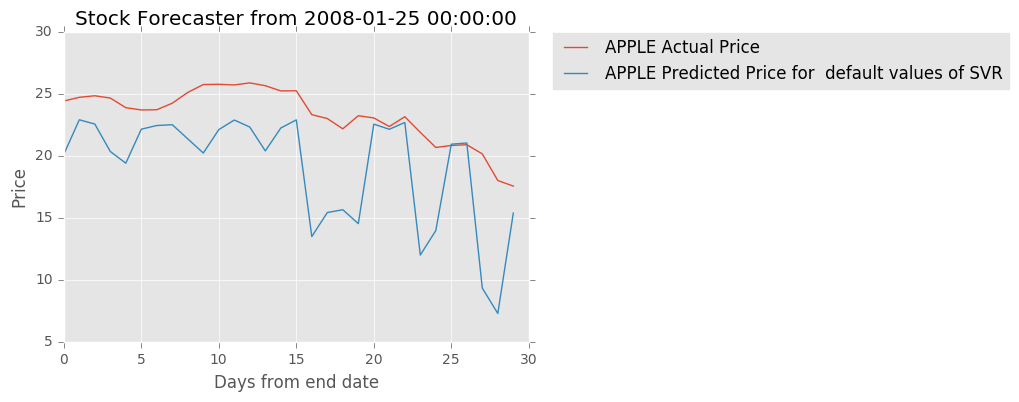

In [21]:
from sklearn import svm
clf_B1=svm.SVR()
clf_B1.fit(X_train,y_train)
forecast_setB1=clf_B1.predict(X_recent)
accuracy_B1=(clf_B1.score(X_test,y_test))
error_B1 = -(X_init[-forecast_out:,0]-forecast_setB1)/X_init[-forecast_out:,0]*100.0
print "R2 Score ={} Error={}".format(accuracy_B1,abs(error_B1).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_B1.predict(X_recent),label='APPLE Predicted Price for  default values of SVR')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The above performance shows us that the accuracy of the classifier is 88 percent and error is 11.5 percent which is more than the benchmark set by the linear regression model set above.The following section will look to reduce this error by refining the algorithms for optimum SVM parameters

<h3>Grid Search and Cross Validation

The grid search technique is a method of finding all possible combinations of parameters and constructing models for them.It called a grid search because the best performing model is searched for and selected from the models of different parameters which are arranged like a grid.In this case grid search is performed over max depth parameter.The best performing model from the grid is selected by making use of a cross validation data<br>

In k-fold cross validation training technique, the data is divided into k sets.in the first loop the first set is used for training and the remaining k-1 sets are used for the testing.In the second iteration,the second set is used for trainig and the remaining k-1 sets are used for testing.This is repeated k times.In the end the optimum parameters are found by averaging the values obtained by the k iterations.


In [18]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = svm.SVR()
    gamma=[]
    for i in range(1,20):
        gamma.append(0.01+0.05*i)
    C=[]
    for i in range(1,500):
        C.append(1+2*i)
        
        
    # TODO: Create a dictionary for the parameter 'C' and 'Gamma' to vary w
    params = {'C': C, 'gamma': gamma}

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    print('Best score for data1:', grid.best_score_)
    print('Best C:',grid.best_estimator_.C)
    print('Best Gamma:',grid.best_estimator_.gamma)
    return grid.best_estimator_

After the above function is called the parameters obtained from the grid search are stored in a pickle file.Since running a grid search everytime the program is called is laborious and time consuming, the classifier is stored in a pickle file.The classifier can be used everytime by simply reading the pickle file while it runs.

In [ ]:
clf_B=fit_model(X,y)
import pickle
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf_B,f)
print "Grid search and pickling is complete"

The below cell shows a more optimized SVR running this time around. The classifier is called from the pickle file.It can be seen that the error and accuracy of this SVM has improved because of the grid search.

Accuracy =0.945753417424 Error=12.6841789082


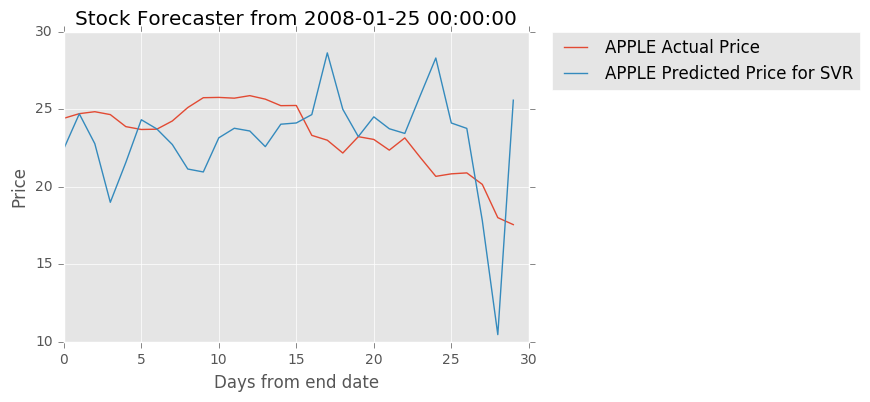

In [23]:
#pickle_in=open('linearregression.pickle','rb')
#clf_B2=pickle.load(pickle_in)
clf_B2=svm.SVR(C=217,gamma=0.11)
clf_B2.fit(X_train,y_train)
forecast_setB2=clf_B2.predict(X_recent)
accuracy_B2=(clf_B2.score(X_test,y_test))
error_B2 = -(X_init[-forecast_out:,0]-forecast_setB2)/X_init[-forecast_out:,0]*100.0
print "Accuracy ={} Error={}".format(accuracy_B2,abs(error_B2).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_B2.predict(X_recent),label='APPLE Predicted Price for SVR')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<h3>Multilayer Perceptrons (MLP)

Multilayer Perceptrons or also called Artificial Neural Networks make use of a basic unit called a perceptron/Neuron.The perceptrons can be arranged in different layers where each layer models a particular feature of the input data.Increasing the number of neurons in each layer also affects the performance of the network.However, care should be taken to not overfit the data by increasing the number of hidden layers and the neurons.<br>
Neural Networks can be used in areas where the data is very stochastic so as to get reasonbly good models.Hence it is a reasonable choice for our finance dataset.

R2 Score =0.88252873788 Error=7.60173336957


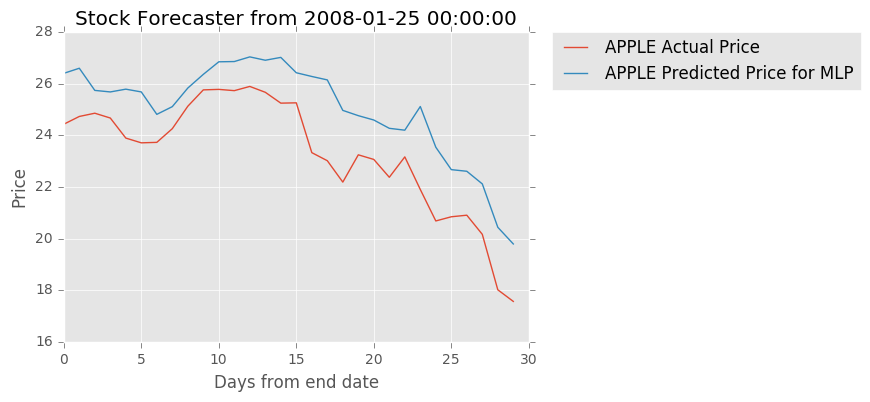

In [26]:
from sklearn import neural_network 
clf_C=neural_network.MLPRegressor(max_iter=1000)
clf_C.fit(X_train,y_train)
forecast_setC=clf_C.predict(X_recent)
accuracy_C=(clf_C.score(X_test,y_test))
error_C = -(X_init[-forecast_out:,0]-forecast_setC)/X_init[-forecast_out:,0]*100.0
print "R2 Score ={} Error={}".format(accuracy_C,abs(error_C).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_C.predict(X_recent),label='APPLE Predicted Price for MLP')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In order to improve the performance of the network it is necessary to modify the structure of the neural network.This is done by changing the number of hidden layers.The hidden_layer_sizes parameter takes care of this .

R2 Score =0.935743738479 Error=7.89325136949


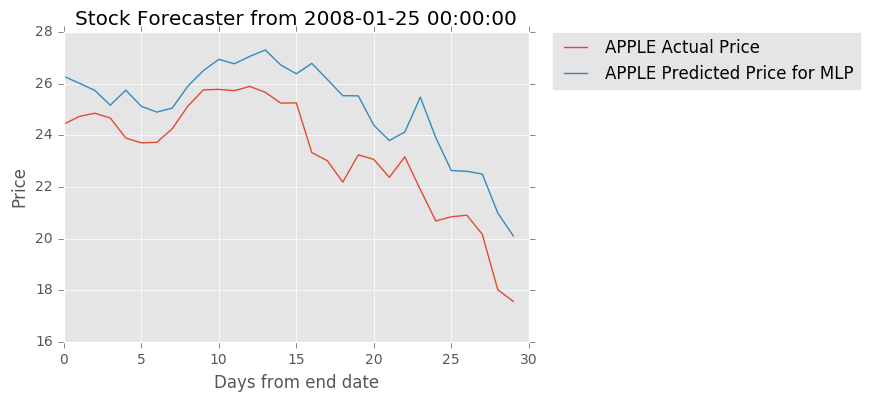

In [27]:
clf_CB=neural_network.MLPRegressor(hidden_layer_sizes=(100,200))
clf_CB.fit(X_train,y_train)
forecast_setCB=clf_CB.predict(X_recent)
accuracy_CB=(clf_CB.score(X_test,y_test))
error_CB = -(X_init[-forecast_out:,0]-forecast_setCB)/X_init[-forecast_out:,0]*100.0
print "R2 Score ={} Error={}".format(accuracy_CB,abs(error_CB).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_CB.predict(X_recent),label='APPLE Predicted Price for MLP')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

After various iterations it was seen that the best size of the neural network was (100,200) as it gave accuracies of 92% and error of about 5.48%

<h3> Decision Tree Regressor </h3>

Decision trees are applied in various areas like  finance ,astronomy ,management and biomedical electronics to name a few.A very good example for a decision tree is the website akinator (http://en.akinator.com).<br>

The advantages of decision trees are  they do not require much normalization or preprocessing.Also they are easier to explain and understand to a client.Morever the importance of features is determined automatically as the more prominent features tend to stay at the upper nodes of the decision tree.A non linear relationship between the variables does not affect the output of the decision tree. <br>

The weakness of this model is that it is prone to overfit.It is becomes practically useless in extremely large datasets as it doesn't learn the nature of the data.Moreover it cannot predict continuous values or cases where there are more than one output variables.However since Decision Tree Regressors are used to predict the trend of stocks in finance, it is worth a shot to see how they behave for stock predection. <br>

/Users/ARM/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


R2 Score =0.98615911984 Error=20.0834737384


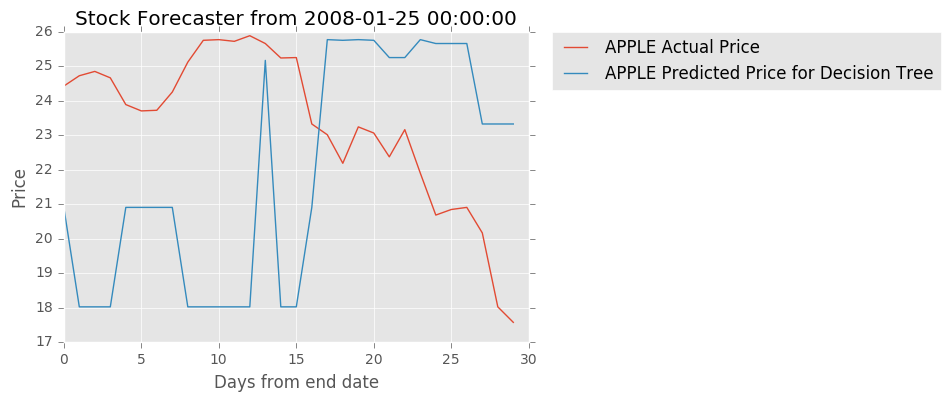

In [28]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

regA=DecisionTreeRegressor()
regA.fit(X_train,y_train)
forecast_setDTGA=regA.predict(X_recent)
accuracy_DTGA=(regA.score(X_test,y_test))
error_DTGA = -(X_init[-forecast_out:,0]-forecast_setDTGA)/X_init[-forecast_out:,0]*100.0
print "R2 Score ={} Error={}".format(accuracy_DTGA,abs(error_DTGA).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(regA.predict(X_recent),label='APPLE Predicted Price for Decision Tree')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The Decision Tree Regressor has a pretty high error. We shall see whether it is possible to minimize this error using the max depth parameter along with grid search.

Parameter 'max_depth' is 8 for the optimal model.
R2 Score =0.987737379583 Error=17.6389765431


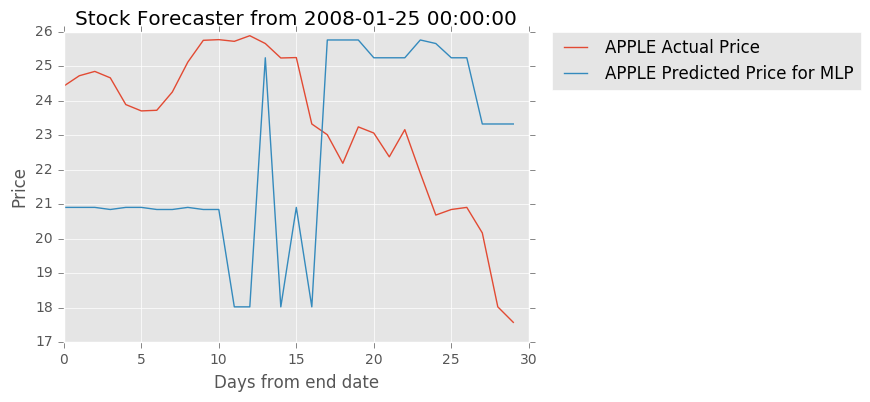

In [30]:
from sklearn.metrics import r2_score
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1, 11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

forecast_setDTG=reg.predict(X_recent)
accuracy_DTG=(reg.score(X_test,y_test))
error_DTG = -(X_init[-forecast_out:,0]-forecast_setDTG)/X_init[-forecast_out:,0]*100.0
print "R2 Score ={} Error={}".format(accuracy_DTG,abs(error_DTG).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(reg.predict(X_recent),label='APPLE Predicted Price for MLP')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

It can be observed that the Decision Tree Regressor overfits to the data and hence gives a very high error even though its accuracy is very high. It is advisable to avoid using this type of regressor. Perhaps if the objective of the decision tree was to predict whether the stock would have gone up or down,it would have performed better.However, in our case it does not perform to expectations as the predicted value is more absolute.

# Performance of the Models on different Date Ranges

We shall the explore the performance of the above models for different date ranges during the period of apples stock.We shall test the models by keeping their parameters same as obtained above but by retraining them during the financial period since stock market predictions are stochastic and need frequent training.<br>

The first date range is from 9th May 1999 to 7th March 2003.


             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1980-12-12  28.75  28.87  28.75  28.75  2093900.0          0.0          1.0   
1980-12-15  27.38  27.38  27.25  27.25   785200.0          0.0          1.0   
1980-12-16  25.37  25.37  25.25  25.25   472000.0          0.0          1.0   
1980-12-17  25.87  26.00  25.87  25.87   385900.0          0.0          1.0   
1980-12-18  26.63  26.75  26.63  26.63   327900.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1980-12-12   0.426158   0.427937  0.426158    0.426158  117258400.0  
1980-12-15   0.405851   0.405851  0.403924    0.403924   43971200.0  
1980-12-16   0.376057   0.376057  0.374278    0.374278   26432000.0  
1980-12-17   0.383468   0.385395  0.383468    0.383468   21610400.0  
1980-12-18   0.394733   0.

/Users/ARM/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/ARM/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
/Users/ARM/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()


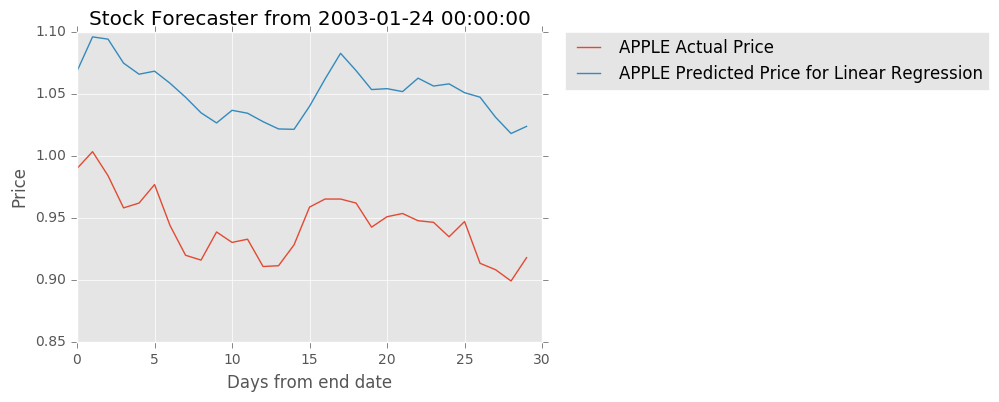

R2 Score =0.703640738526 Error=9.99535783516


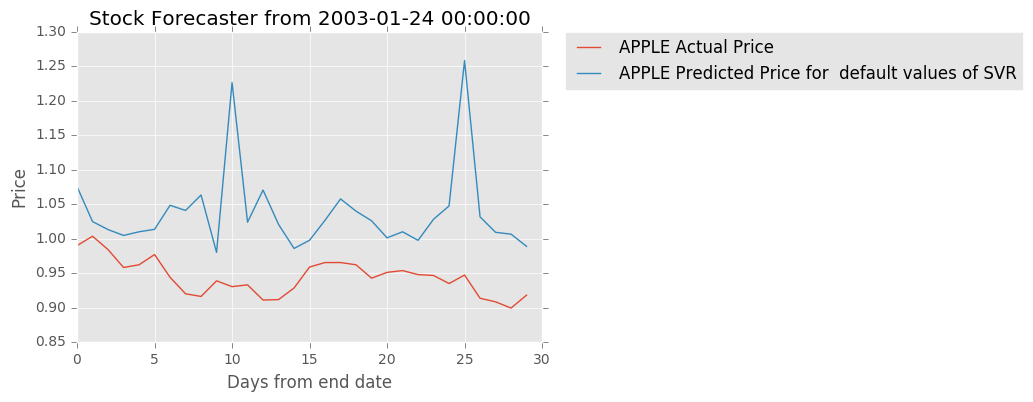

R2 Score =0.703594924181 Error=2.69213775268


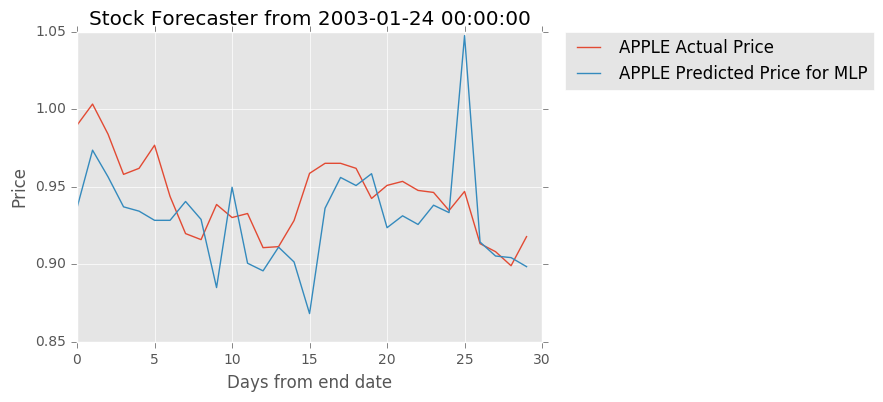

R2 Score =0.814938893826 Error=8.82761209574


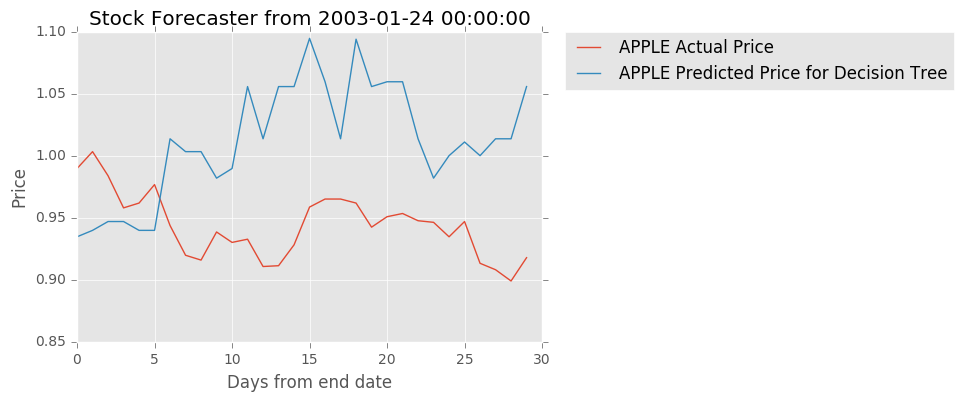

In [31]:
import quandl 
quandl.ApiConfig.api_key = '1NzgmzP1XT9QYBsxjpYc' #API access key

df = quandl.get("WIKI/AAPL")
print df.head()#Show the first five rows of the dataframe

start_date='1999-05-9'
end_date='2003-03-7' 
df= df.ix[start_date:end_date]
print df.head()# splice the data for queried date range
df = df[["Adj. Open", "Adj. High", "Adj. Low", "Adj. Close", "Adj. Volume","Split Ratio","Ex-Dividend"]]
df["HL_PCT"] = (df["Adj. High"] - df["Adj. Low"])/df["Adj. Low"] * 100.0 #The High-Low percentage change 
df["PCT_change"] = (df["Adj. Close"] - df["Adj. Open"])/df["Adj. Open"]* 100.0 #The Close-Open  percentage change

df["Rolling Mean 10"]=pd.rolling_mean(df["Adj. Close"],window=10) #The 10 day rolling mean
df["Rolling Mean 50"]=pd.rolling_mean(df["Adj. Close"],window=50) #The 50 day rolling mean
df["Rolling std"]=pd.rolling_std(df["Adj. Close"],window=10) #The 10 day rolling standard deviation
df = df[["Adj. Close","HL_PCT", "PCT_change", "Adj. Volume","Rolling std","Rolling Mean 50","Rolling Mean 10","Split Ratio","Ex-Dividend"]]
forecast_col="Adj. Close"
df.fillna(-99999,inplace=True)

new=df.copy()

forecast_out=30 # number of days into the future
df['label']=df[forecast_col].shift(-forecast_out)
df = df[["Adj. Close","HL_PCT", "PCT_change", "Adj. Volume","Rolling std","Rolling Mean 50","Rolling Mean 10","Split Ratio","Ex-Dividend","label"]]# shifting and adding the new data to the old dataframe
df.dropna(inplace=True)

from sklearn import preprocessing
X=np.array(df.drop(['label'],axis=1))
X_init=X.copy()
#X=X[:,1:] #cooment this line to exclude Adj. Close as a feature
X=preprocessing.scale(X)
X_recent=X[-forecast_out:]
X=X[:-forecast_out]

from sklearn import cross_validation
df.dropna(inplace= True)
y=np.array(df['label'])
y=y[:-forecast_out]
X_train, X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.3)

import time,datetime
from sklearn.linear_model import LinearRegression
clf_A=LinearRegression(n_jobs=-1)
clf_A.fit(X_train,y_train)
forecast_setA=clf_A.predict(X_recent)
accuracy_A=(clf_A.score(X_test,y_test))
error_A = -(X_init[-forecast_out:,0]-forecast_setA)/X_init[-forecast_out:,0]*100.0
last_date=df.iloc[-1].name
one_day = 86400
last_unix = time.mktime(last_date.timetuple())
next_unix=last_unix+one_day
next_date=datetime.datetime.fromtimestamp(next_unix)
print "R2 Score ={} Error={}".format(accuracy_A,abs(error_A).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_A.predict(X_recent),label='APPLE Predicted Price for Linear Regression')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

from sklearn import svm
clf_B1=svm.SVR(C=217,gamma=0.11)
clf_B1.fit(X_train,y_train)
forecast_setB1=clf_B1.predict(X_recent)
accuracy_B1=(clf_B1.score(X_test,y_test))
error_B1 = -(X_init[-forecast_out:,0]-forecast_setB1)/X_init[-forecast_out:,0]*100.0
print "R2 Score ={} Error={}".format(accuracy_B1,abs(error_B1).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_B1.predict(X_recent),label='APPLE Predicted Price for  default values of SVR')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

from sklearn import neural_network 
clf_C=neural_network.MLPRegressor(max_iter=1000,hidden_layer_sizes=(100,200))
clf_C.fit(X_train,y_train)
forecast_setC=clf_C.predict(X_recent)
accuracy_C=(clf_C.score(X_test,y_test))
error_C = -(X_init[-forecast_out:,0]-forecast_setC)/X_init[-forecast_out:,0]*100.0
print "R2 Score ={} Error={}".format(accuracy_C,abs(error_C).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_C.predict(X_recent),label='APPLE Predicted Price for MLP')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

regA=DecisionTreeRegressor()
regA.fit(X_train,y_train)
forecast_setDTGA=regA.predict(X_recent)
accuracy_DTGA=(regA.score(X_test,y_test))
error_DTGA = -(X_init[-forecast_out:,0]-forecast_setDTGA)/X_init[-forecast_out:,0]*100.0
print "R2 Score ={} Error={}".format(accuracy_DTGA,abs(error_DTGA).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(regA.predict(X_recent),label='APPLE Predicted Price for Decision Tree')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The second date range is a more recent date range from 4 April 2009 to 5th February 2015

             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1980-12-12  28.75  28.87  28.75  28.75  2093900.0          0.0          1.0   
1980-12-15  27.38  27.38  27.25  27.25   785200.0          0.0          1.0   
1980-12-16  25.37  25.37  25.25  25.25   472000.0          0.0          1.0   
1980-12-17  25.87  26.00  25.87  25.87   385900.0          0.0          1.0   
1980-12-18  26.63  26.75  26.63  26.63   327900.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1980-12-12   0.426158   0.427937  0.426158    0.426158  117258400.0  
1980-12-15   0.405851   0.405851  0.403924    0.403924   43971200.0  
1980-12-16   0.376057   0.376057  0.374278    0.374278   26432000.0  
1980-12-17   0.383468   0.385395  0.383468    0.383468   21610400.0  
1980-12-18   0.394733   0.

/Users/ARM/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/ARM/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
/Users/ARM/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()


R2 Score =0.95834346785 Error=2.17505107232


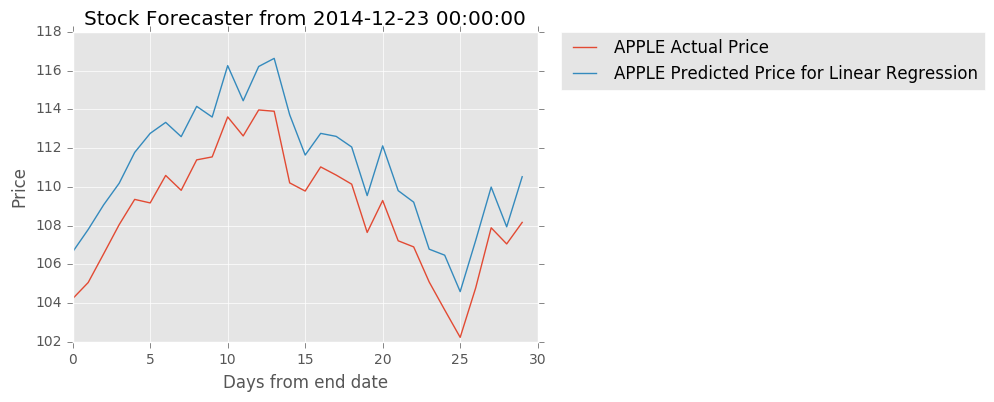

Accuracy =0.951455185905 Error=3.79975153206


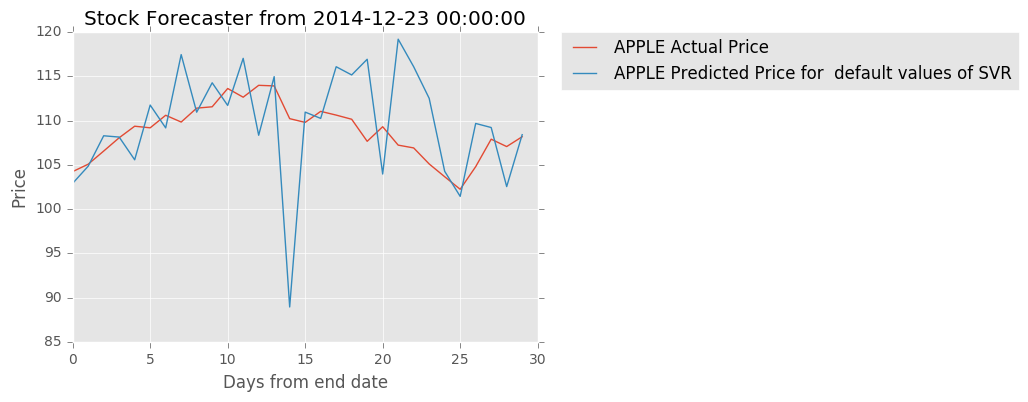

R2 Score =0.961125956484 Error=4.62747064276


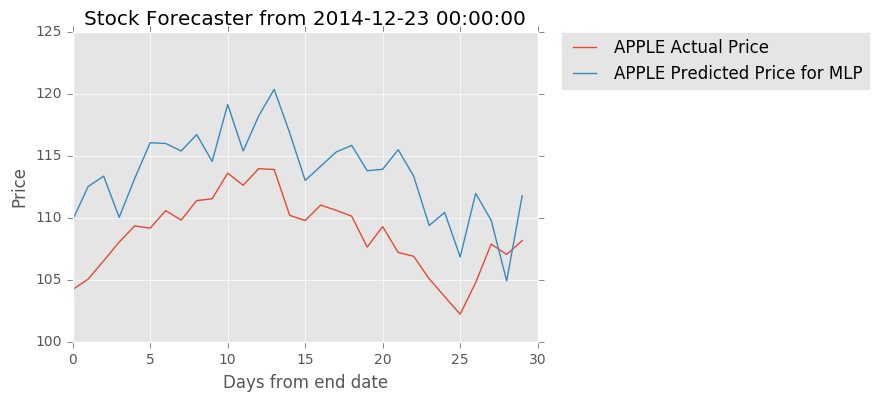

R2 Score =0.98599197446 Error=2.98544780024


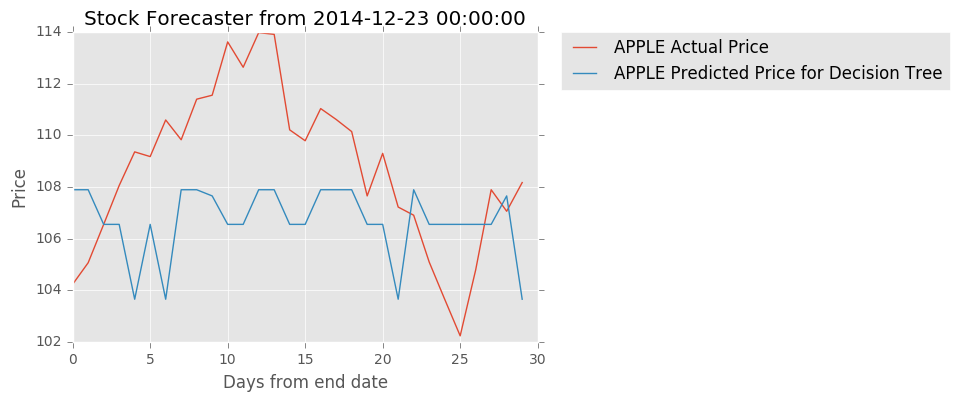

In [32]:
import quandl 
quandl.ApiConfig.api_key = '1NzgmzP1XT9QYBsxjpYc' #API access key

df = quandl.get("WIKI/AAPL")
print df.head()#Show the first five rows of the dataframe

start_date='2009-04-4'
end_date='2015-02-5' 
df= df.ix[start_date:end_date]
print df.head()# splice the data for queried date range
df = df[["Adj. Open", "Adj. High", "Adj. Low", "Adj. Close", "Adj. Volume","Split Ratio","Ex-Dividend"]]
df["HL_PCT"] = (df["Adj. High"] - df["Adj. Low"])/df["Adj. Low"] * 100.0 #The High-Low percentage change 
df["PCT_change"] = (df["Adj. Close"] - df["Adj. Open"])/df["Adj. Open"]* 100.0 #The Close-Open  percentage change

df["Rolling Mean 10"]=pd.rolling_mean(df["Adj. Close"],window=10) #The 10 day rolling mean
df["Rolling Mean 50"]=pd.rolling_mean(df["Adj. Close"],window=50) #The 50 day rolling mean
df["Rolling std"]=pd.rolling_std(df["Adj. Close"],window=10) #The 10 day rolling standard deviation
df = df[["Adj. Close","HL_PCT", "PCT_change", "Adj. Volume","Rolling std","Rolling Mean 50","Rolling Mean 10","Split Ratio","Ex-Dividend"]]
forecast_col="Adj. Close"
df.fillna(-99999,inplace=True)

new=df.copy()

forecast_out=30 # number of days into the future
df['label']=df[forecast_col].shift(-forecast_out)
df = df[["Adj. Close","HL_PCT", "PCT_change", "Adj. Volume","Rolling std","Rolling Mean 50","Rolling Mean 10","Split Ratio","Ex-Dividend","label"]]# shifting and adding the new data to the old dataframe
df.dropna(inplace=True)

from sklearn import preprocessing
X=np.array(df.drop(['label'],axis=1))
X_init=X.copy()
#X=X[:,1:] #cooment this line to exclude Adj. Close as a feature
X=preprocessing.scale(X)
X_recent=X[-forecast_out:]
X=X[:-forecast_out]

from sklearn import cross_validation
df.dropna(inplace= True)
y=np.array(df['label'])
y=y[:-forecast_out]
X_train, X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.3)

import time,datetime
from sklearn.linear_model import LinearRegression
clf_A=LinearRegression(n_jobs=-1)
clf_A.fit(X_train,y_train)
forecast_setA=clf_A.predict(X_recent)
accuracy_A=(clf_A.score(X_test,y_test))
error_A = -(X_init[-forecast_out:,0]-forecast_setA)/X_init[-forecast_out:,0]*100.0
last_date=df.iloc[-1].name
one_day = 86400
last_unix = time.mktime(last_date.timetuple())
next_unix=last_unix+one_day
next_date=datetime.datetime.fromtimestamp(next_unix)
print "R2 Score ={} Error={}".format(accuracy_A,abs(error_A).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_A.predict(X_recent),label='APPLE Predicted Price for Linear Regression')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

from sklearn import svm
clf_B1=svm.SVR(C=217,gamma=0.11)
clf_B1.fit(X_train,y_train)
forecast_setB1=clf_B1.predict(X_recent)
accuracy_B1=(clf_B1.score(X_test,y_test))
error_B1 = -(X_init[-forecast_out:,0]-forecast_setB1)/X_init[-forecast_out:,0]*100.0
print "Accuracy ={} Error={}".format(accuracy_B1,abs(error_B1).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_B1.predict(X_recent),label='APPLE Predicted Price for  default values of SVR')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

from sklearn import neural_network 
clf_C=neural_network.MLPRegressor(max_iter=1000,hidden_layer_sizes=(100,200))
clf_C.fit(X_train,y_train)
forecast_setC=clf_C.predict(X_recent)
accuracy_C=(clf_C.score(X_test,y_test))
error_C = -(X_init[-forecast_out:,0]-forecast_setC)/X_init[-forecast_out:,0]*100.0
print "R2 Score ={} Error={}".format(accuracy_C,abs(error_C).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_C.predict(X_recent),label='APPLE Predicted Price for MLP')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

regA=DecisionTreeRegressor()
regA.fit(X_train,y_train)
forecast_setDTGA=regA.predict(X_recent)
accuracy_DTGA=(regA.score(X_test,y_test))
error_DTGA = -(X_init[-forecast_out:,0]-forecast_setDTGA)/X_init[-forecast_out:,0]*100.0
print "R2 Score ={} Error={}".format(accuracy_DTGA,abs(error_DTGA).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(regA.predict(X_recent),label='APPLE Predicted Price for Decision Tree')
plt.xlabel('Days from end date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Results - Model Evaluation,Validation and Jusitification

In [37]:

from tabulate import tabulate

print "For the date range '2004-01-17' to '2008-03-8'"
table_1 = [["Algorithm","R2 Score","Error%"],
         ["Linear Regression",0.941,9.41],
         ["SVR",0.945,12.68],
         ["MLP",0.935,7.89],
         ["Decision Tree Regressor",0.987,17.638]]
print tabulate(table_1, headers="firstrow", tablefmt="simple")


print "For the date range '1999-05-9' to '2003-03-7' "
table_2 = [["Algorithm","R2 Score","Error%"],
         ["Linear Regression",0.675,11.40],
         ["SVR",0.703,9.99],
         ["MLP",0.703,2.69],
         ["Decision Tree Regressor",0.815,8.82]]
print tabulate(table_2, headers="firstrow", tablefmt="simple")


print "For the date range '2009-04-4' to '2015-02-5'"
table_3 = [["Algorithm","R2 Score","Error%"],
         ["Linear Regression",0.950,2.17],
         ["SVR",0.950,3.80],
         ["MLP",0.828,4.62],
         ["Decision Tree Regressor",0.985,2.98]]
print tabulate(table_3, headers="firstrow", tablefmt="simple")


For the date range '2004-01-17' to '2008-03-8'
Algorithm                  R2 Score    Error%
-----------------------  ----------  --------
Linear Regression             0.941     9.41
SVR                           0.945    12.68
MLP                           0.935     7.89
Decision Tree Regressor       0.987    17.638
For the date range '1999-05-9' to '2003-03-7' 
Algorithm                  R2 Score    Error%
-----------------------  ----------  --------
Linear Regression             0.675     11.4
SVR                           0.703      9.99
MLP                           0.703      2.69
Decision Tree Regressor       0.815      8.82
For the date range '2009-04-4' to '2015-02-5'
Algorithm                  R2 Score    Error%
-----------------------  ----------  --------
Linear Regression             0.95       2.17
SVR                           0.95       3.8
MLP                           0.828      4.62
Decision Tree Regressor       0.985      2.98


In [ ]:
clf_CB=fit_modelnn(X,y)
forecast_setCB=clf_CB.predict(X_recent)
accuracy_CB=(clf_CB.score(X_test,y_test))
error_CB = -(X_init[-forecast_out:,0]-forecast_setCB)/X_init[-forecast_out:,0]*100.0
print "Accuracy ={} Error={}".format(accuracy_CB,abs(error_CB).mean())
plt.title("Stock Forecaster from %s"%next_date)
plt.plot(X_init[-forecast_out:,0],label='APPLE Actual Price')
plt.plot(clf_CB.predict(X_recent),label='APPLE Predicted Price for MLP')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The above tables show us the accuracies and errors we obtain for the same machine learning algorithms for different date ranges.<br>

The the accuracies obatained during training can be considered a metric for model evaluation.Higher accuracies can mean that we have a good model, however care should be taken to see that there isn't a case of overfit as can be seen in the decision tree regressor.We shall discuss the parameteres and the significance they play on the model. <br>

In the MLP, the parameter <i>hidden_layer_sizes</i> controls the number of neurons and hidden layers in the neural network.This helps to increase the complexity of the model and increase accuracies as it adds more nodes into the network.

The decision tree regressor needs branches to vary the accuracy of the model. By increasing the <i>max_depth</i> parameter it is possible to achieve this.However care should be taken as to not to overfit on the model.This is the reason why we use cross validation and grid search to find the most optimum depth.

The SVR algorithm uses a decison boundary to fit a regressor.Here we will be using the radial basis function to fit a boundary .The parameters to change thus will be <i>C</i> and <i>Gamma</i>.<i>C </i>is the cost for misclassification and <i>Gamma</i> is the tolerancr form the boundary region.Again, like the decision tree regressor this is found by using a grid search and cross validation for <i>C</i> and <i>Gamma</i> parameters.

We can see that MLP model we obtained performs better than the rest of the models and can usually outperform the model obtained by linear regression.It can be seen that SVR models also perfom well but they are give out lesser accuracies during training.It is also a common belief in the finance circles that SVR models are good for financial analytics.The findings in this project further reinforces this belief.

# Conclusion

<h3>Freeform Visualization

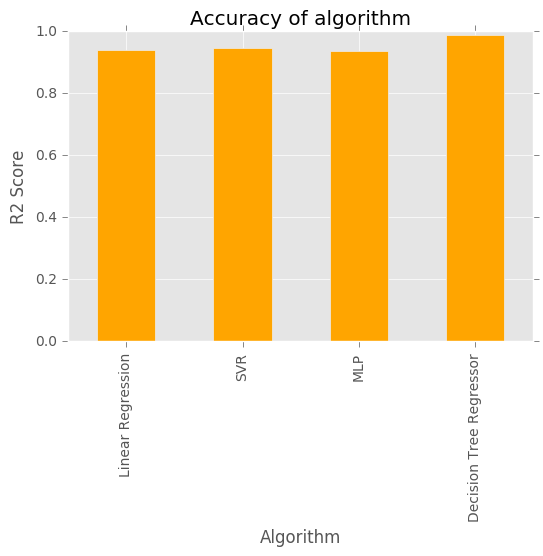

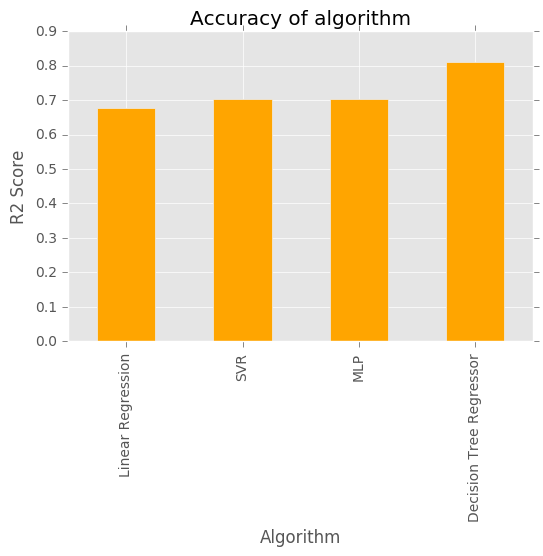

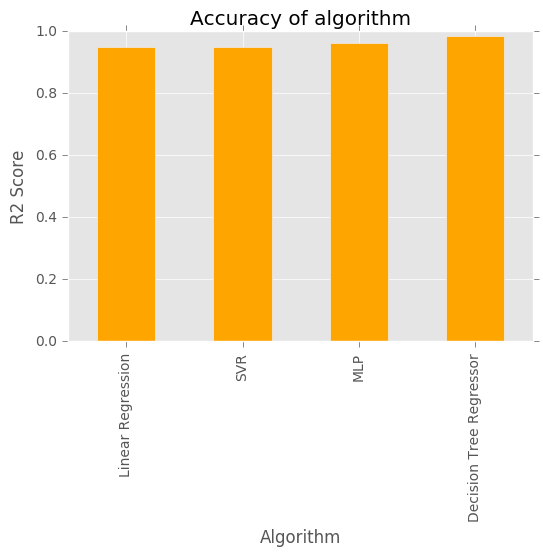

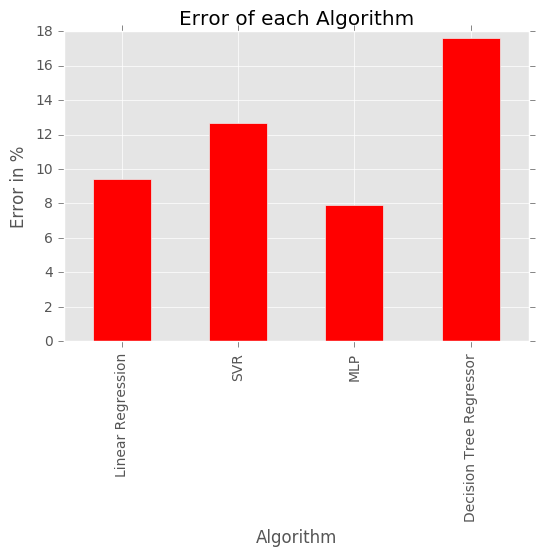

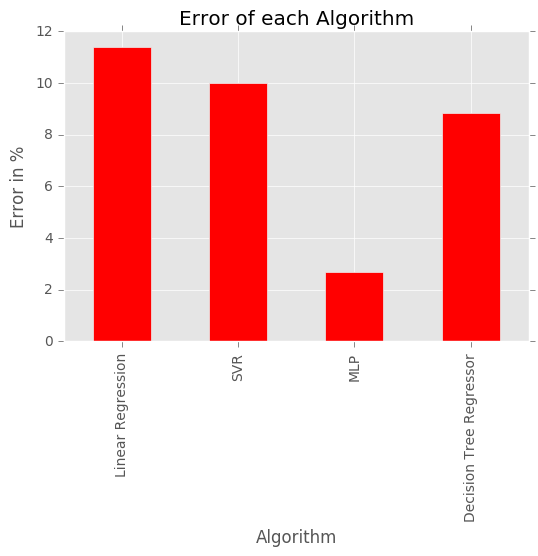

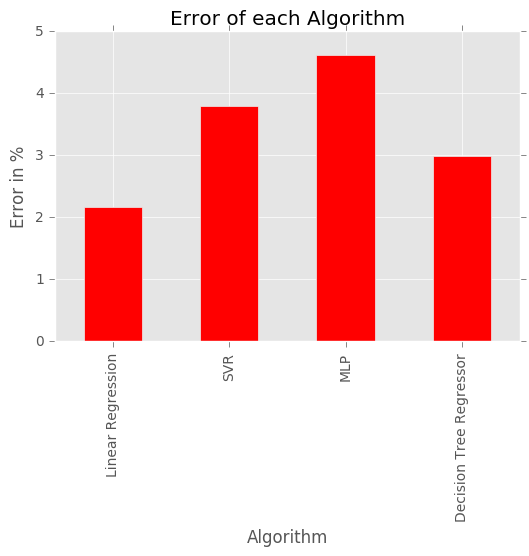

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
data_1 = {'R2 Score': [0.941,0.945,0.935,0.987],
        'Error': [9.41,12.68,7.89,17.63]
       }
tf_1 = pd.DataFrame(data_1, index = ['Linear Regression', 'SVR', 'MLP', 'Decision Tree Regressor'])

data_2 = {'R2 Score': [0.6757,0.703,0.703,0.81],
        'Error': [11.40,9.99,2.69,8.82]
       }
tf_2 = pd.DataFrame(data_2, index = ['Linear Regression', 'SVR', 'MLP', 'Decision Tree Regressor'])

data_3 = {'R2 Score': [0.95,0.95,0.961,0.985],
        'Error': [2.17,3.80,4.62,2.98]
       }
tf_3 = pd.DataFrame(data_3, index = ['Linear Regression', 'SVR', 'MLP', 'Decision Tree Regressor'])
for tf in [tf_1,tf_2,tf_3]:
    plt.figure()
    tf['R2 Score'].plot.bar(color='Orange') 
    plt.xlabel('Algorithm')
    plt.ylabel('R2 Score')
    plt.title('Accuracy of algorithm')
    plt.show();
for tf in [tf_1,tf_2,tf_3]:
    plt.figure()
    tf['Error'].plot.bar(color='Red') 
    plt.xlabel('Algorithm')
    plt.ylabel('Error in %')
    plt.title('Error of each Algorithm')
    plt.show();


<h3>Reflection

From the project it could be seen that decision trees are not a very good choice for predicting stochastic data as they tend to overfit and give unsatisfactory results.This was the case for all the three cases.It was also seen that multivariate linear regression was a pretty good indicator of the performance of the stock.<br>
Neural Networks also gave encouraging results .Probably more convoluted neural networks or deep learning approaches would give us more accuracy in prediction.It could also be seen that SVR's perform well in these cases.<br>
Even though the errors obtained are in the ranges of 8%-15% which would mean somethings as less as 1$ a share, when dealing in large volumes(millions of units) this amounts to a significant number and can cause huge losses to the trader.Hence, even such errors should not enocourage an ML specialist to jump into trading.However financial markets are good subject to understand and model stochastic systems.Finding benchmark models is difficult in this domain and one has to often rely on primitive models as benchmarks to compare models against.

<h3>Improvements

For the SVR model, more combinations of C and gamma were needed to try and find a more optimum model.This could have been achieved by using a more powerful computational unit .However this couldn't be done at this stage due to lack of resources and knowledge(this project was intended as beginner's project and integrating GPUs requires some advanced knowledge).The same could be done for all parameters of different algorithms.Another alternative would be to use something like AWS and pickle the model obtained.<br>

In the case of MLP, a grid search could have been used to get the optimum value of hidden_layer_sizes. However, the gridSearch threw an error even when all possible combinations of the tuple was fed as a parameter to the hidden_layer_sizes. Employing a grid search here would have been a better alternative than trial and error used in the project.<br>

Also with knowledge of Deep Neural Networks, it would be easier to design a more robust and accurate model in the future as primitive neural networks were giving reasonably good performance here.